Import the necessary libraries


In [ ]:
### Import Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load the datasets

In [ ]:
import pandas as pd

# Load the Penguins dataset from the raw GitHub content URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)


Some basic explorations on the Penguins Datasets

In [ ]:
# Display the first few rows
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#Display the summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#Display the brief statistical info of the dataset
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
#Check for missing values
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Univariate Visualizations Analysis

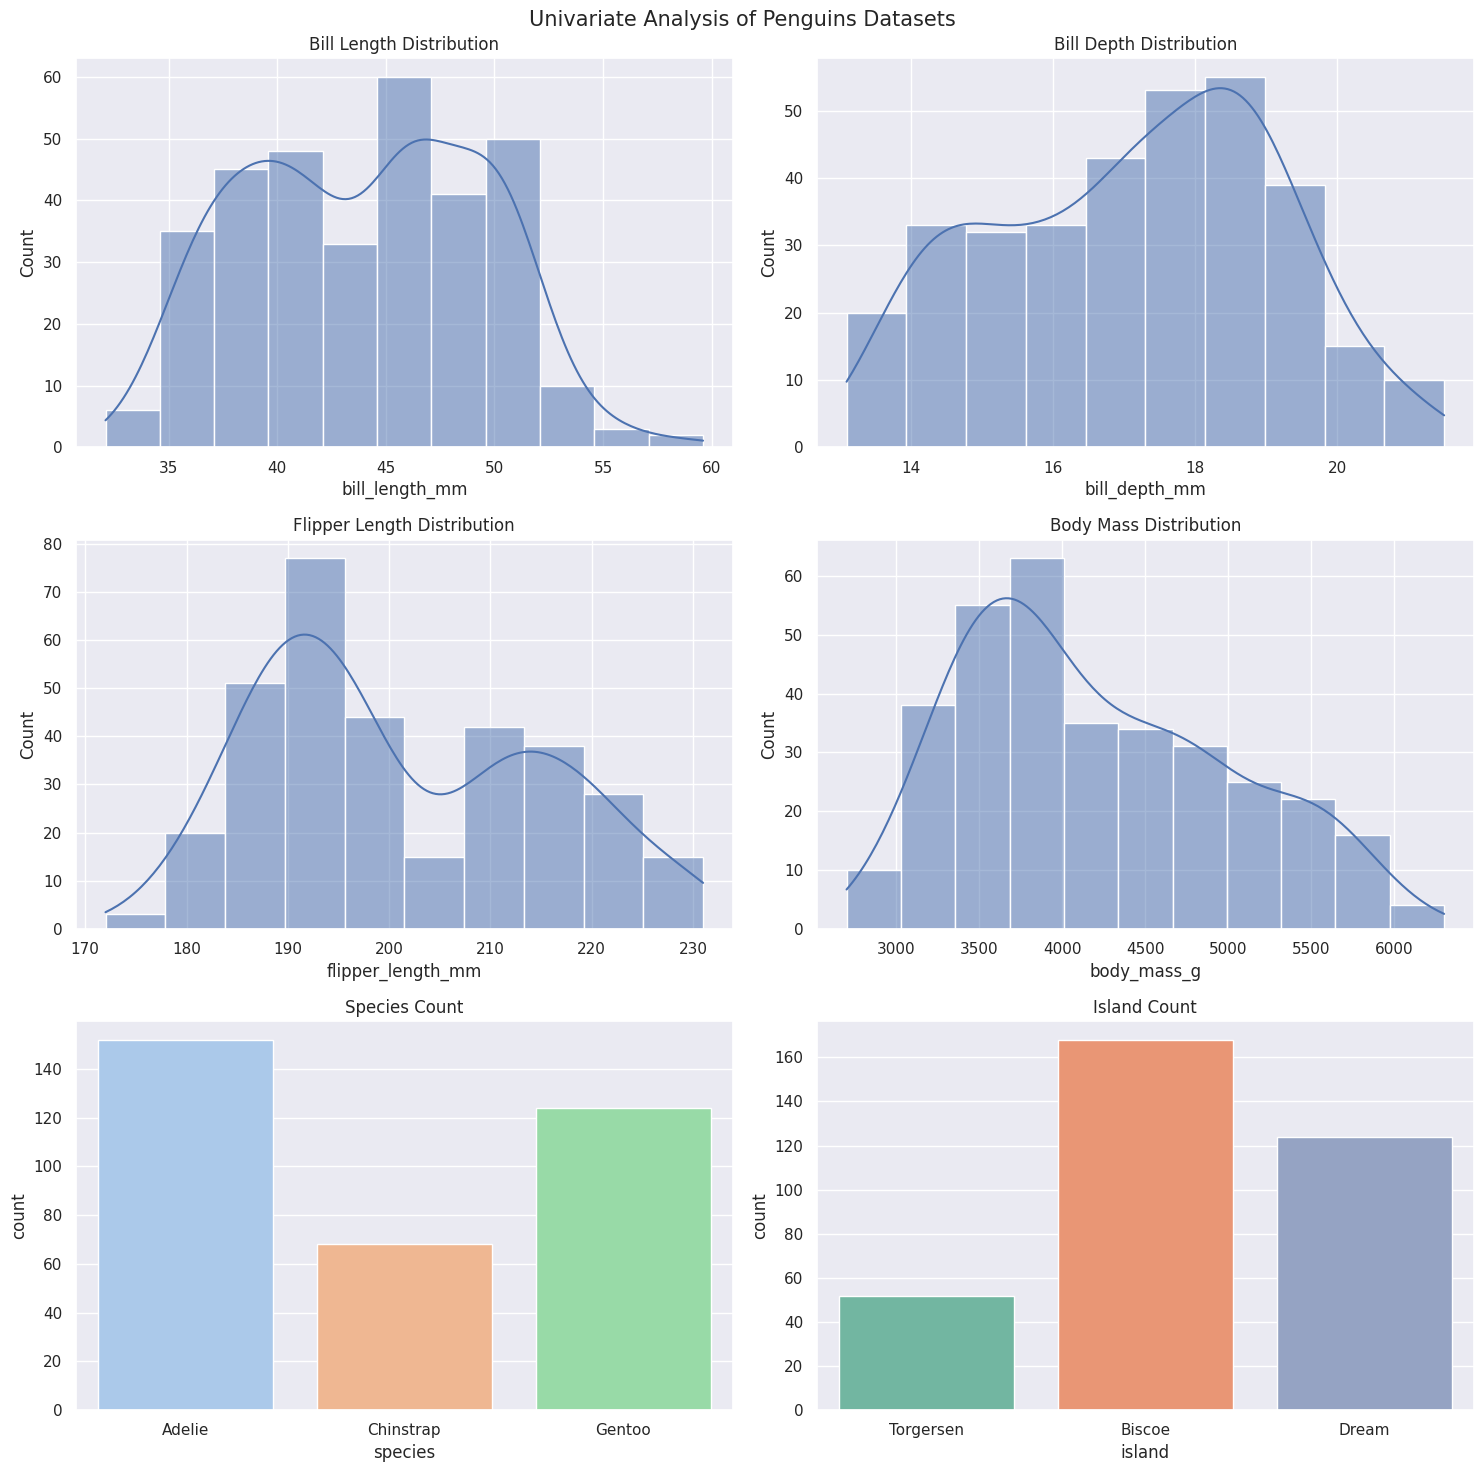

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up the visual theme
sns.set_theme(style="darkgrid")

#Prepare the figure layout
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Univariate Analysis of Penguins Datasets', fontsize=15)

#Histogram for bill_length_mm
sns.histplot(data=df.dropna(), kde=True, x='bill_length_mm', ax=axes[0, 0])
axes[0, 0].set_title('Bill Length Distribution')

#Histogram for bill_depth_mm
sns.histplot(data=df.dropna(),kde=True, x='bill_depth_mm', ax=axes[0, 1])
axes[0, 1].set_title('Bill Depth Distribution')

#Histogram for flipper_length_mm
sns.histplot(data=df.dropna(),kde=True, x='flipper_length_mm', ax=axes[1, 0])
axes[1, 0].set_title('Flipper Length Distribution')

#Histogram for body_mass_g
sns.histplot(data=df.dropna(),kde=True, x='body_mass_g', ax=axes[1, 1])
axes[1, 1].set_title('Body Mass Distribution')

#Count plot for species
sns.countplot(data=df, x='species', ax=axes[2, 0], palette='pastel') # Changed index to axes[2, 0]
axes[2, 0].set_title('Species Count')

#Count plot for island
sns.countplot(data=df, x='island', ax=axes[2, 1],palette='Set2') # Changed index to axes[2, 1]
axes[2, 1].set_title('Island Count')

#Plotting all the histogram
plt.tight_layout()
plt.show()

Bivariate Visualizations Analysis

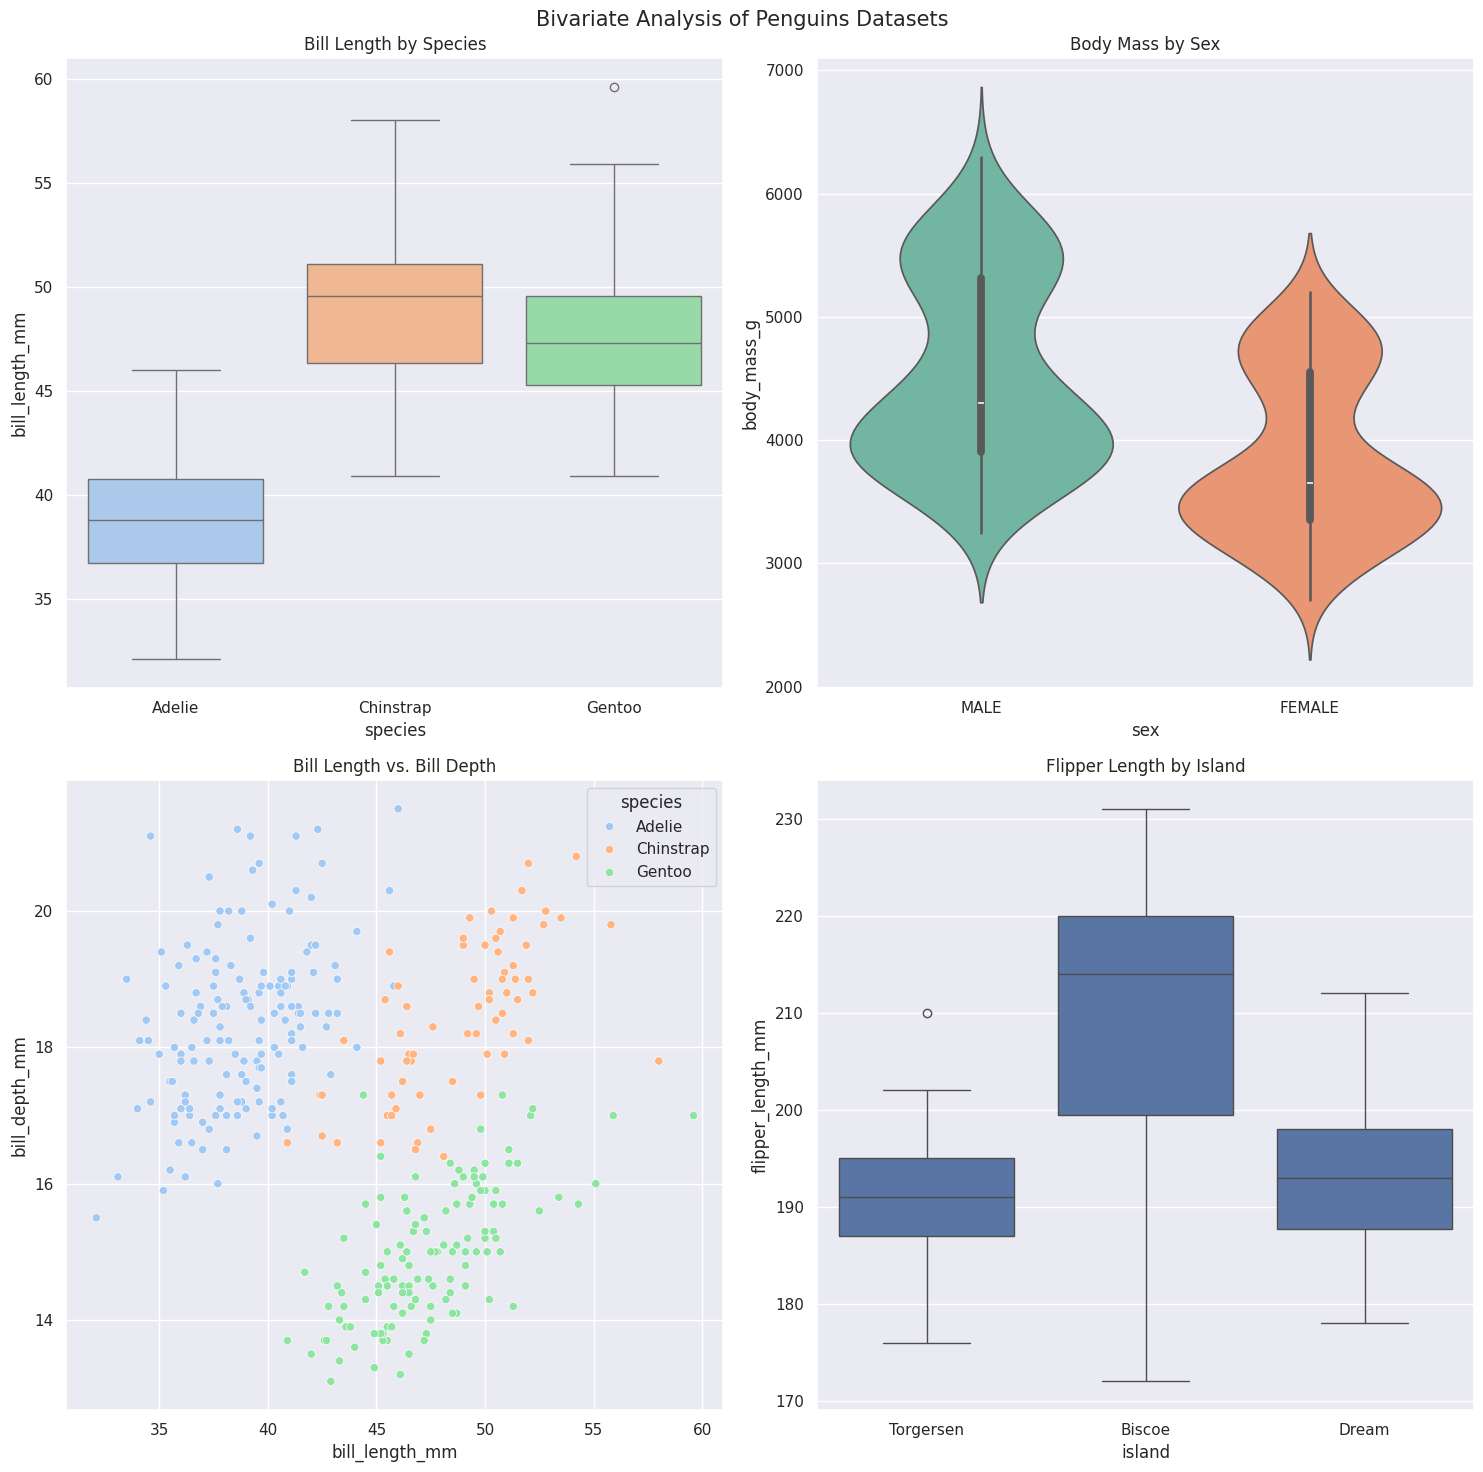

In [ ]:
#Prepare the figure layout
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)

#Box plot: Bill length by species
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Bill Length by Species')

#Violin plot :Body max by sex
sns.violinplot(data=df, x='sex', y='body_mass_g', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Body Mass by Sex')

#Scatter plot: Bill length vs. Bill length
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Bill Length vs. Bill Depth')

#Box plot : Flipper length by island
sns.boxplot(data=df, x='island', y='flipper_length_mm', ax=axes[1, 1])
axes[1, 1].set_title('Flipper Length by Island')

#Plotting all the histogram
plt.tight_layout()
plt.show()

Multivariate Visualizationa Analaysis

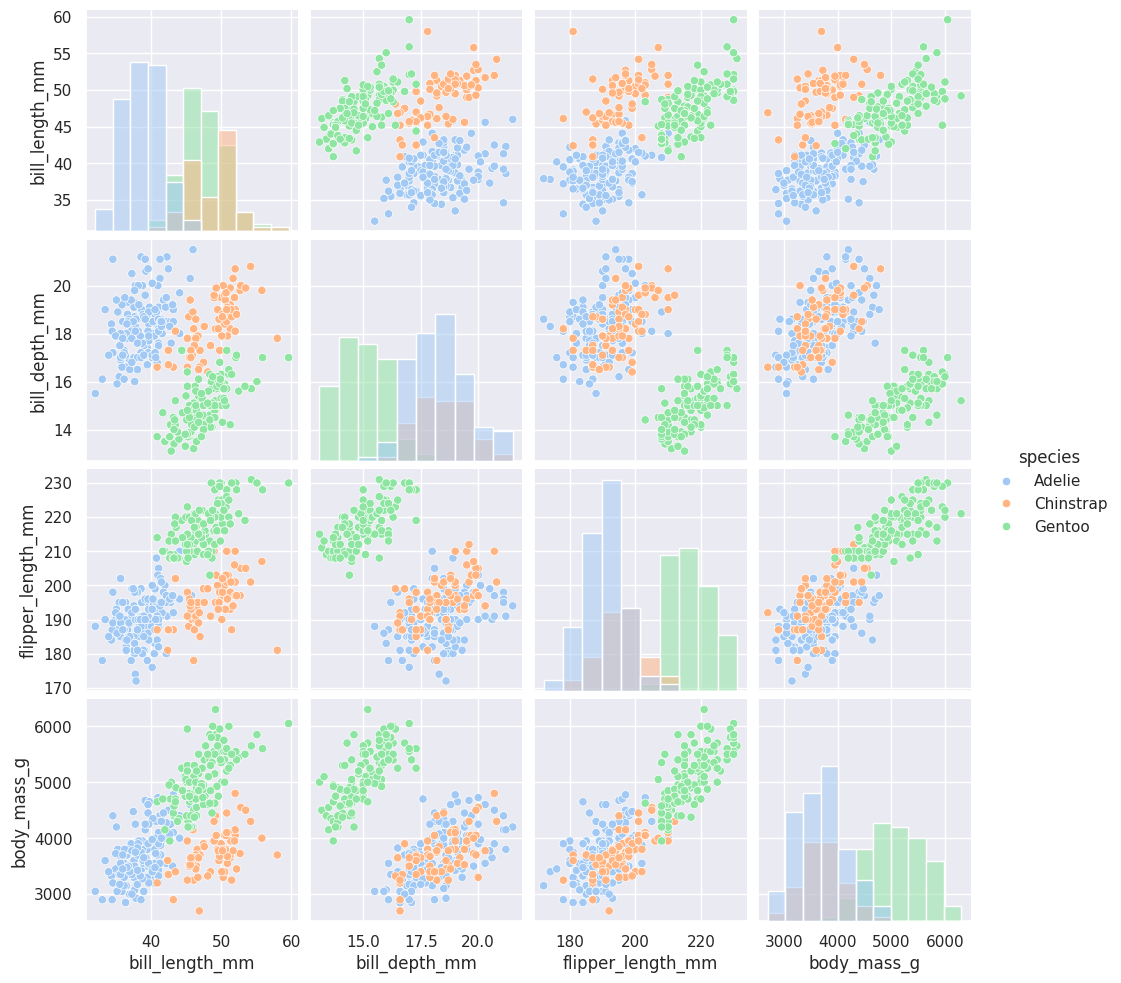

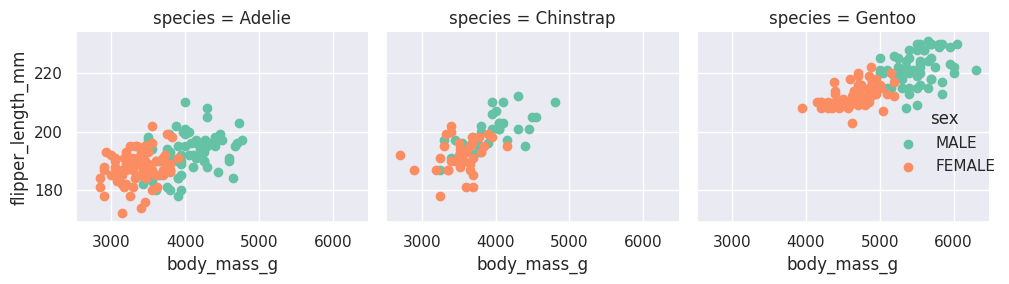

In [ ]:
#Drop rows with missing values for acurate mutivariate visualizations
df.dropna(inplace=True)

#Pairplot colored by species
sns.pairplot(data=df, hue='species', diag_kind='hist', palette='pastel')


#FacetGrid: Body Mass vs. Flipper length split by Sex and Species
sns.FacetGrid(data=df, col='species', hue='sex', palette='Set2').map(plt.scatter, 'body_mass_g', 'flipper_length_mm').add_legend()


#Plotting all the histogram
plt.tight_layout()
plt.show()

5 key insights summary from above visual analysis

Insight 1: Gentoo Penguins Are Morphologically Distinct
From the pairplot and boxplots, Gentoo penguins clearly stand out:

They have longer bills, longer flippers, and higher body mass on average.

Visually separable from Adelie and Chinstrap in multiple features.

Insight 2: Sexual Dimorphism Is Evident
In the violin plots and FacetGrid:

Male penguins generally have greater body mass than females across all species.

This difference is particularly notable in Adelie and Gentoo species.

Insight 3: Flipper Length Varies by Island
The boxplot for flipper length vs. island shows:

Penguins on Biscoe Island tend to have longer flippers.

Torgersen hosts the smallest flipper ranges — possibly indicating species or ecological differences.



Insight 4: Bill Length and Depth Help Distinguish Species
From the scatter plot of bill length vs. bill depth:

Adelie: shorter and deeper bills.

Chinstrap: moderate in both.

Gentoo: long and shallow bills.

This makes these two features highly useful for species classification.

 Insight 5: Data Quality and Missing Values
Initial inspection showed:

Minor missing data in numeric features (~2 values each).

Sex column had 11 missing entries.

These can be cleaned easily and should be handled in modeling or dashboard us